# Importy

In [202]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display

In [203]:
root = 'analize'

In [204]:
input_data = os.path.join(root, 'images')
input_images_paths = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
    ]
)

input_data = os.path.join(root, 'manual')
manual_images_paths = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
    ]
)

input_data = os.path.join(root, 'processed')
processed_images_paths = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
    ]
)

input_data = os.path.join(root, 'neural2')
neural_images_paths = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
    ]
)

In [205]:
zipped_data = zip(input_images_paths, manual_images_paths, processed_images_paths, neural_images_paths)

In [206]:
def load_images(input_image_path, manual_images_path, processed_image_path, neural_images_path):
    input_image = cv2.imread(input_image_path)
    
    manual_image = cv2.imread(manual_images_path)
    gray_manual_image = cv2.cvtColor(manual_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_manual_image, (512, 512))
    
    processed_image = cv2.imread(processed_image_path)
    gray_processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)
    
    neural_image = cv2.imread(neural_images_path)
    gray_neural_image = cv2.cvtColor(neural_image, cv2.COLOR_BGR2GRAY)
    
    return input_image, resized_image, gray_processed_image, gray_neural_image

In [207]:
def plot_images(input_image, manual_image, processed_image, neural_image):
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 3, (1,3)), plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)), plt.title('Oryginalny obraz')
    plt.axis('off')
    plt.subplot(2, 3, 4), plt.imshow(processed_image, cmap='gray'), plt.title('Przetworzony obraz')
    plt.axis('off')
    plt.subplot(2, 3, 5), plt.imshow(manual_image, cmap='gray'), plt.title('Ekspercki obraz')
    plt.axis('off')
    plt.subplot(2, 3, 6), plt.imshow(neural_image, cmap='gray'), plt.title('Obraz z uczenia maszynowego')
    plt.axis('off')
    plt.show()

In [208]:
LIMIT = 128

In [209]:
def compare_images(output_image, manual_image):
    correct_mask = manual_image > LIMIT
    mask_height, mask_width = manual_image.shape
    mask = output_image > LIMIT
    
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0

    for i in range(mask_height):
        for j in range(mask_width):
            if mask[i][j] == True and correct_mask[i][j] == True:
                true_positive += 1
            elif mask[i][j] == True and correct_mask[i][j] == False:
                false_positive += 1
            elif mask[i][j] == False and correct_mask[i][j] == True:
                false_negative += 1
            elif mask[i][j] == False and correct_mask[i][j] == False:
                true_negative += 1
        
    accuracy = (true_positive + true_negative)/(true_positive + false_positive + false_negative + true_negative)
    sensitivity = (true_positive)/(true_positive + false_negative)
    specificity = (true_negative)/(false_positive + true_negative)
    arith_mean = (sensitivity + specificity)/2
    
    return accuracy, sensitivity, specificity, arith_mean

In [210]:
def display_table(proc_accuracy, proc_sensitivity, proc_specificity, proc_arith_mean, neur_accuracy, neur_sensitivity, neur_specificity, neur_arith_mean):
    data = [{'Przetworzony obraz': proc_accuracy, 'Obraz z uczenia maszynowego': neur_accuracy},
        {'Przetworzony obraz': proc_sensitivity, 'Obraz z uczenia maszynowego': neur_sensitivity},
        {'Przetworzony obraz': proc_specificity, 'Obraz z uczenia maszynowego': neur_specificity},
        {'Przetworzony obraz': proc_arith_mean, 'Obraz z uczenia maszynowego': neur_arith_mean}]
    df = pd.DataFrame(data)
    df = df.rename(index={0: 'Trafność'})
    df = df.rename(index={1: 'Czułość'})
    df = df.rename(index={2: 'Swoistość'})
    df = df.rename(index={3: 'Średnia arytmetyczna czułości i swoistości'})
    display(df)

In [211]:
def avg(my_list):
    return sum(my_list) / len(my_list)

analize\images\13_dr.JPG


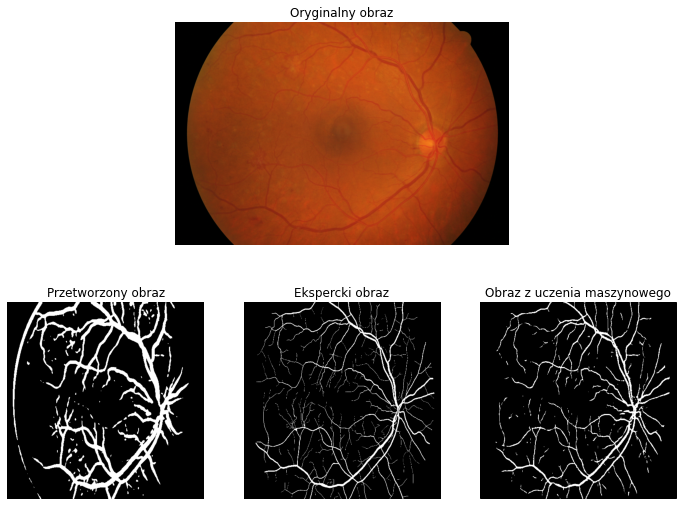

,Przetworzony obraz,Obraz z uczenia maszynowego
Trafność,0.870617,0.958958
Czułość,0.739002,0.764696
Swoistość,0.880309,0.973264
Średnia arytmetyczna czułości i swoistości,0.809656,0.868980


analize\images\13_h.jpg


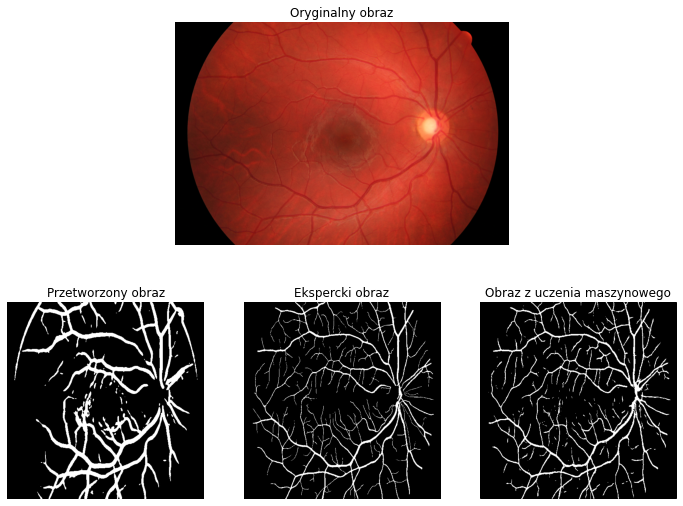

,Przetworzony obraz,Obraz z uczenia maszynowego
Trafność,0.874329,0.958218
Czułość,0.704817,0.844343
Swoistość,0.890486,0.969072
Średnia arytmetyczna czułości i swoistości,0.797652,0.906708


analize\images\14_g.jpg


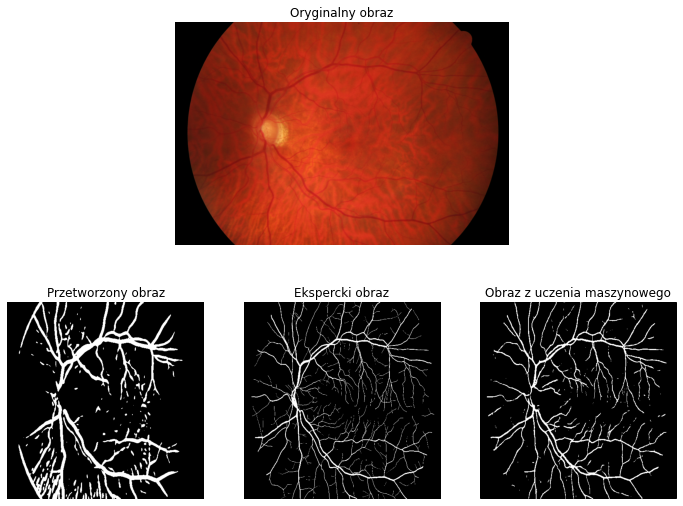

,Przetworzony obraz,Obraz z uczenia maszynowego
Trafność,0.879738,0.953655
Czułość,0.636456,0.757458
Swoistość,0.898321,0.968642
Średnia arytmetyczna czułości i swoistości,0.767389,0.863050


analize\images\15_dr.JPG


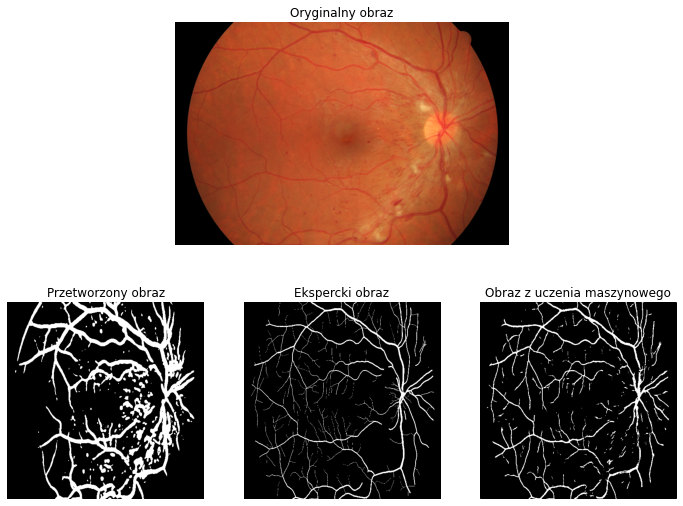

,Przetworzony obraz,Obraz z uczenia maszynowego
Trafność,0.835934,0.952965
Czułość,0.775274,0.780965
Swoistość,0.840199,0.965058
Średnia arytmetyczna czułości i swoistości,0.807737,0.873012


analize\images\15_h.jpg


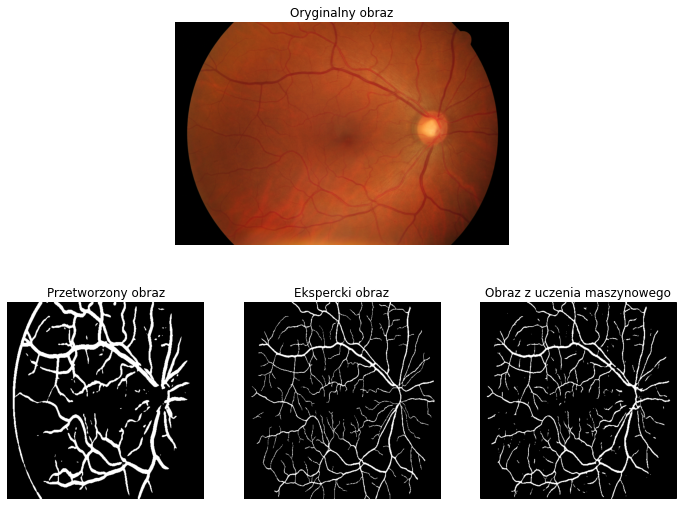

,Przetworzony obraz,Obraz z uczenia maszynowego
Trafność,0.880348,0.963100
Czułość,0.720200,0.823966
Swoistość,0.894009,0.974969
Średnia arytmetyczna czułości i swoistości,0.807105,0.899468


Średnie arytmetyczne


,Przetworzony obraz,Obraz z uczenia maszynowego
Trafność,0.868193,0.957379
Czułość,0.715150,0.794286
Swoistość,0.880665,0.970201
Średnia arytmetyczna czułości i swoistości,0.797908,0.882243


In [212]:
proc_accuracy_list = []
proc_sensitivity_list = []
proc_specificity_list = []
proc_arith_mean_list = []

neur_accuracy_list = []
neur_sensitivity_list = []
neur_specificity_list = []
neur_arith_mean_list = []

for input_im_p, manual_im_p, processed_im_p, neural_im_p in zipped_data:
    print(input_im_p)
    input_image, manual_image, processed_image, neural_image = load_images(input_im_p, manual_im_p, processed_im_p, neural_im_p)
    plot_images(input_image, manual_image, processed_image, neural_image)
    
    proc_accuracy, proc_sensitivity, proc_specificity, proc_arith_mean = compare_images(processed_image, manual_image)
    neur_accuracy, neur_sensitivity, neur_specificity, neur_arith_mean = compare_images(neural_image, manual_image)
    
    proc_accuracy_list.append(proc_accuracy)
    proc_sensitivity_list.append(proc_sensitivity)
    proc_specificity_list.append(proc_specificity)
    proc_arith_mean_list.append(proc_arith_mean)
    
    neur_accuracy_list.append(neur_accuracy)
    neur_sensitivity_list.append(neur_sensitivity)
    neur_specificity_list.append(neur_specificity)
    neur_arith_mean_list.append(neur_arith_mean)
    
    display_table(proc_accuracy, proc_sensitivity, proc_specificity, proc_arith_mean, neur_accuracy, neur_sensitivity, neur_specificity, neur_arith_mean)
    
avg_proc_accuracy = avg(proc_accuracy_list)
avg_proc_sensitivity = avg(proc_sensitivity_list)
avg_proc_specificity = avg(proc_specificity_list)
avg_proc_arith_mean = avg(proc_arith_mean_list)

avg_neur_accuracy = avg(neur_accuracy_list)
avg_neur_sensitivity = avg(neur_sensitivity_list)
avg_neur_specificity = avg(neur_specificity_list)
avg_neur_arith_mean = avg(neur_arith_mean_list)

print("Średnie arytmetyczne")
display_table(avg_proc_accuracy, avg_proc_sensitivity, avg_proc_specificity, avg_proc_arith_mean, avg_neur_accuracy, avg_neur_sensitivity, avg_neur_specificity, avg_neur_arith_mean)